## Loan Prediction - Kredi tahmini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [5]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
136263,878690ca-ef5a-4b28-ac83-b481956dfeff,17c9a1a6-fb1d-42ba-8158-d14beeb35652,Charged Off,35361,Short Term,719.0,10+ years,Home Mortgage,166700.0,Debt Consolidation,$637.63,13.2,NaN,9,0,34541,43339,0.0,0.0
253505,fc859f33-2799-466c-9a1f-5c7645ac0e51,c1bc3d36-6e3c-4d53-b468-3177a882c441,Fully Paid,19566,Long Term,665.0,5 years,Rent,60655.0,Debt Consolidation,"$1,657.90",13.2,NaN,15,0,14269,22686,0.0,0.0
99458,62d06300-6ff8-491c-9ec5-6dc69ab550ec,1ed4dafd-6d92-460c-aeac-0031319c47f4,Fully Paid,5461,Short Term,739.0,7 years,Home Mortgage,23616.0,Debt Consolidation,$171.22,20.5,NaN,15,0,5788,32155,0.0,0.0
240022,eef4097b-f2fa-4d80-96b9-ee181708d6bd,ce5bf186-4882-4885-9808-67876d8a7ca5,Fully Paid,4068,Short Term,724.0,< 1 year,Home Mortgage,45765.0,Debt Consolidation,$602.57,20.7,32.0,11,0,4075,7423,0.0,0.0
223259,de2a527e-8b1f-4a1b-8e8c-6b955f950c37,a411e947-0f73-4c79-8bc6-6838f6e50bcb,Fully Paid,10141,Long Term,NaN,2 years,Rent,NaN,Debt Consolidation,$608.99,18.0,18.0,8,1,6308,8356,1.0,0.0
252179,fb35e876-d8d6-4a71-8089-59d408df13e1,5811e62a-ec2d-49c8-bcef-a8604256aefe,Fully Paid,25525,Short Term,736.0,10+ years,Home Mortgage,161318.0,Debt Consolidation,"$2,903.72",25.1,70.0,6,0,53197,55127,0.0,0.0
160337,9f7fef79-30bb-4a95-a52b-349443dd2828,ab06822d-9d65-4879-abbb-15beb19fa029,Charged Off,2710,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,"$1,366.89",21.0,7.0,10,0,9948,34661,0.0,0.0
80275,4fb8c312-a076-4459-8cd9-63dce2e42872,54c25c4d-7d69-45e8-a275-59e46f73b6a1,Charged Off,12262,Short Term,NaN,1 year,Rent,NaN,Debt Consolidation,$898.16,15.8,21.0,12,1,6107,8378,1.0,0.0
44966,2cb728db-5d00-4348-a630-bea1596bd285,80edc13a-c242-4f7c-a85b-15d9bd2fb479,Charged Off,25093,Long Term,738.0,10+ years,Home Mortgage,45167.0,Debt Consolidation,$479.90,21.2,NaN,21,0,12855,109875,0.0,0.0
28415,1c6af97c-e3ce-4007-95d0-5af7135f4056,0b5d60cc-1c29-4fd3-af10-f2c04d92b657,Fully Paid,99999999,Long Term,738.0,5 years,Home Mortgage,55507.0,Debt Consolidation,$840.47,30.0,NaN,8,0,18234,30543,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [7]:
df.isnull().sum() #Credit Score-Years in current job-Annual Income-Months since last delinquent-Bankruptcies-Tax Liens

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [8]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [9]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [10]:
df.shape

(256984, 19)

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

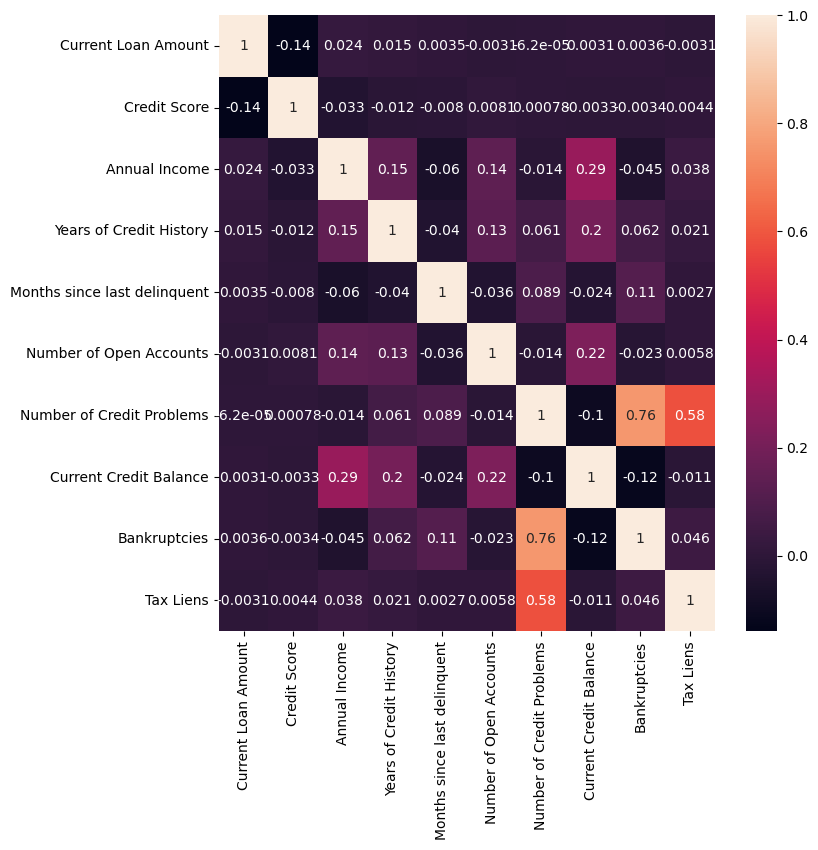

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

df.columns

In [12]:
df=df.rename(columns={'Loan Status': 'Kredi Durumu', 'Current Loan Amount': 'Mevcut Kredi Tutarı',"Term":"Vade","Annual Income":"Yıllık Gelir","Bankruptcies":"İflas","Tax Liens":"Vergi Hacizleri","işte geçirilen yıllar":"Years in current job","Son borctan gecen aylar":"Months since last delinquent"})

In [13]:
df.head(1)

,Loan ID,Customer ID,Kredi Durumu,Mevcut Kredi Tutarı,Vade,Credit Score,Years in current job,Home Ownership,Yıllık Gelir,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,İflas,Vergi Hacizleri
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0


In [14]:
#Katkısı olmayacakları siliyoruz
df=df.drop('Loan ID', axis=1)
df=df.drop('Customer ID', axis=1)

In [15]:
#Verileri düzenleyip, temizliyoruz
df["Monthly Debt"]=df["Monthly Debt"].str.replace("$","")
df["Monthly Debt"]=df["Monthly Debt"].str.replace(",","", regex=True)
df["Monthly Debt"]=df["Monthly Debt"].astype("float")
df["Monthly Debt"].head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: Monthly Debt, dtype: float64

In [16]:
df["Years in current job"].fillna(df["Years in current job"].mode()[0], inplace=True)

In [17]:
df["Years in current job"]=df["Years in current job"].str.extract("(\d+)")

In [18]:
df["Years in current job"]=df["Years in current job"].astype("int")

In [19]:
# Tekrar eden verileri kaldırıp temizliğe ve düzene devam
df = df.drop_duplicates()

In [20]:
df["Purpose"].replace("other","Other", inplace=True)

In [21]:
df["Maximum Open Credit"].replace("#VALUE!",np.nan, inplace=True)

In [22]:
df["Maximum Open Credit"]=pd.to_numeric(df["Maximum Open Credit"], errors="coerce")
df["Maximum Open Credit"][172595:]

184662        NaN
184663        NaN
184664     9144.0
184665    47766.0
184666    47766.0
           ...   
256979    44080.0
256980     9758.0
256981    20090.0
256982    20090.0
256983    62371.0
Name: Maximum Open Credit, Length: 67779, dtype: float64

In [23]:
df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].mean(),inplace=True)

In [24]:
df["Yıllık Gelir"].fillna(df["Yıllık Gelir"].mean(), inplace=True)

In [25]:
df["Months since last delinquent"]=df["Months since last delinquent"].fillna("0")

In [26]:
df["Months since last delinquent"]=df["Months since last delinquent"].astype("int")

In [27]:
df["İflas"].fillna(df["İflas"].median(),inplace=True)

In [28]:
df["Vergi Hacizleri"].fillna(df["Vergi Hacizleri"].median(),inplace=True)

In [29]:
df.isnull().sum()

Kredi Durumu                        0
Mevcut Kredi Tutarı                 0
Vade                                0
Credit Score                    59346
Years in current job                0
Home Ownership                      0
Yıllık Gelir                        0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
İflas                               0
Vergi Hacizleri                     0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Kredi Durumu                  240374 non-null  uint8  
 1   Mevcut Kredi Tutarı           240374 non-null  int64  
 2   Vade                          240374 non-null  uint8  
 3   Credit Score                  181028 non-null  float64
 4   Years in current job          240374 non-null  int32  
 5   Home Ownership                240374 non-null  object 
 6   Yıllık Gelir                  240374 non-null  float64
 7   Purpose                       240374 non-null  object 
 8   Monthly Debt                  240374 non-null  float64
 9   Years of Credit History       240374 non-null  float64
 10  Months since last delinquent  240374 non-null  int32  
 11  Number of Open Accounts       240374 non-null  int64  
 12  Number of Credit Problems     240374 non-nul

In [32]:
#Yazıları sayıya çevirmek için get dummies i devreye sokuyoruz

In [33]:
df["Kredi Durumu"]=pd.get_dummies(df["Kredi Durumu"],drop_first=True)

In [ ]:
# df["Kredi Durumu"]=df["Kredi Durumu"].replace("Fully Paid".1).replace("Charged Off",0).astype(int) bu da olabilirdi hatta daha iyi olurdu

In [34]:
df["Vade"]=pd.get_dummies(df["Vade"],drop_first=True)

In [37]:
df["Purpose"]=pd.get_dummies(df["Purpose"],drop_first=True)

ValueError: Columns must be same length as key

In [39]:
df.head(1)

,Kredi Durumu,Mevcut Kredi Tutarı,Vade,Credit Score,Years in current job,Home Ownership,Yıllık Gelir,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,İflas,Vergi Hacizleri
0,1,11520,1,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41,10,0,6760,16056.0,0.0,0.0


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
X=df[df["Credit Score"].notnull()]
X=X.drop("Credit Score", axis=1)
X=X[0:2000]
X=X[["Years of Credit History","Monthly Debt","Current Credit Balance","Number of Open Accounts","Number of Credit Problems","Mevcut Kredi Tutarı"]] #Numarasal olanları aldık
print(X.shape)
print(df.shape)

(2000, 6)
(240374, 17)


In [47]:
y=df[df["Credit Score"].notnull()]
y=y["Credit Score"]
y=y[0:2000]
print(y.shape)
print(df.shape)

(2000,)
(240374, 17)


In [49]:
gb=GradientBoostingClassifier().fit(X,y)

In [50]:
df_without_creditscore=df[df["Credit Score"].isnull()]
df_without_creditscore=df_without_creditscore.drop("Credit Score",axis=1)
df_without_creditscore=df_without_creditscore[["Years of Credit History","Monthly Debt","Current Credit Balance","Number of Open Accounts","Number of Credit Problems","Mevcut Kredi Tutarı"]]
df_without_creditscore.shape

(59346, 6)

In [51]:
df.loc[df["Credit Score"].isnull(),"Credit Score"]=gb.predict(df_without_creditscore)

In [52]:
df["Credit Score"].isnull().sum() 

0

In [53]:
df.isnull().sum()

Kredi Durumu                    0
Mevcut Kredi Tutarı             0
Vade                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Yıllık Gelir                    0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
İflas                           0
Vergi Hacizleri                 0
dtype: int64

In [79]:
df['Years in current job'].value_counts()

Series([], Name: Years in current job, dtype: int64)

In [80]:
df['Years in current job'].unique()

array([nan])

In [31]:
df['Kredi Durumu'].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Kredi Durumu, dtype: int64

In [ ]:
#Modellemeye Başlıyoruz pycaret geliyor

In [54]:
# pycaret
from pycaret.classification import *
exp_name=setup(data=df,target="Kredi Durumu")
best_model=compare_models()

,Description,Value
0,Session id,8799
1,Target,Kredi Durumu
2,Target type,Binary
3,Original data shape,"(240374, 17)"
4,Transformed data shape,"(240374, 28)"
5,Transformed train set shape,"(168261, 28)"
6,Transformed test set shape,"(72113, 28)"
7,Numeric features,14
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8109,0.8257,0.9645,0.8126,0.8821,0.4228,0.4656,15.7230
rf,Random Forest Classifier,0.8056,0.8220,0.9674,0.8061,0.8794,0.3982,0.4469,22.8400
lightgbm,Light Gradient Boosting Machine,0.7980,0.8109,0.9763,0.7949,0.8763,0.3554,0.4203,1.4260
xgboost,Extreme Gradient Boosting,0.7976,0.8112,0.9652,0.7999,0.8748,0.3691,0.4187,14.5700
gbc,Gradient Boosting Classifier,0.7960,0.8042,0.9851,0.7890,0.8762,0.3343,0.4158,23.3090
ada,Ada Boost Classifier,0.7912,0.7950,0.9676,0.7931,0.8717,0.3400,0.3952,5.4830
ridge,Ridge Classifier,0.7890,0.0000,0.9895,0.7810,0.8730,0.2972,0.3918,0.4450
lda,Linear Discriminant Analysis,0.7890,0.7690,0.9889,0.7814,0.8730,0.2985,0.3916,0.7900
lr,Logistic Regression,0.7863,0.7209,0.9864,0.7802,0.8712,0.2904,0.3794,2.2880
knn,K Neighbors Classifier,0.7518,0.7042,0.8996,0.7906,0.8416,0.2791,0.2920,15.8330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#elhamdülillah lilhıtam biavnillahi teala =)